In [1]:
# librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
# lectura de datos
df_train = pd.read_csv("/content/drive/MyDrive/ITAM/Maestria/2 Semestre/Metodos de Gran Escala/train.csv")
df_test =  pd.read_csv("/content/drive/MyDrive/ITAM/Maestria/2 Semestre/Metodos de Gran Escala/test.csv")

In [3]:
# vemos todas las columnas
df_train.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [4]:
# nos ponemos a ver las variables que son categoricas y sus niveles
variables_char = df_train.select_dtypes(include=['object']).columns
niveles = df_train[variables_char].apply(lambda x: x.nunique())
print(niveles)

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64


In [6]:
# nos vamos a quedar solo con algunas variables que sonaban bien jejeje,
# por ejemplo sale type y sale condition no tienen mucho sentido porque
# las conoces hasta después de la venta

columns_to_keep = [
    'GrLivArea', 'LotArea',
    'YearBuilt', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageCars',
    'GarageArea', 'Fireplaces', 'SalePrice'
]

# filtramos
df_train_filt = df_train[columns_to_keep]

# Basic EDA

<Axes: xlabel='LotArea', ylabel='SalePrice'>

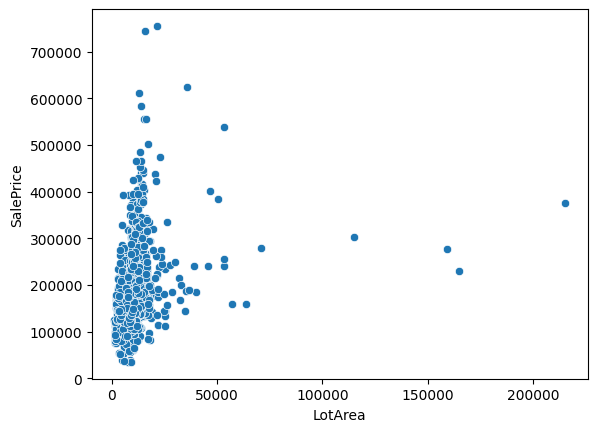

In [ ]:
sns.scatterplot(x='LotArea', y='SalePrice', data=df_train_filt)

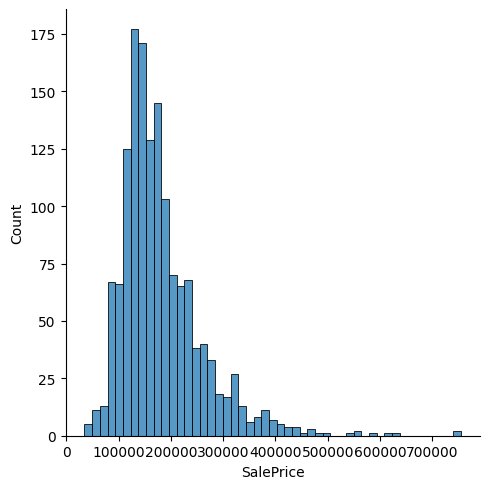

In [ ]:
sns.displot(
    df_train_filt, x="SalePrice",
    facet_kws=dict(margin_titles=True),

)

In [7]:
X = df_train_filt.drop('SalePrice', axis=1)
y = df_train_filt['SalePrice']

# Splitting the training data for model validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np


# Scale features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Create KNN regressor
knn_regressor = KNeighborsRegressor()

# Define parameter grid for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 31)}

# Use GridSearchCV to find the best k for KNN, using cross-validation
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best k value
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k: {best_k}")

# Train KNN with the best k (GridSearchCV automatically refits the best model on the entire training set)
knn_best = grid_search.best_estimator_


Best k: 8


In [11]:
# Evaluate the model on the test set
columns_to_keep = [
    'GrLivArea', 'LotArea',
    'YearBuilt', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageCars',
    'GarageArea', 'Fireplaces'
]

df_test_filt = df_test[columns_to_keep]
mean_values = df_train_filt.mean()

# Fill missing values with the mean of each column
df_test_filt = df_test_filt.fillna(mean_values)

X_test_scaled = scaler.transform(df_test_filt)


predicted_sale_price = knn_best.predict(X_test_scaled)